**Intro**

   The project's goal is to analyze the Iris dataset, which includes various data and characteristics of different flowers. The objective is to develop an algorithm capable of predicting and classifying new flower species using the variables present in the dataset. A decision tree classifier will serve as the estimator. Following the initial results, hyperparameter optimization may be pursued.

**Loading Initial Libraries**

In [1]:
#numpy
import numpy as np

#pandas
import pandas as pd

#matplotlib
import matplotlib.pyplot as plt

#seaborn
import seaborn as sns

#warnings
import warnings
warnings.filterwarnings("ignore")

#time
import time

**Loading Dataset**

In [2]:
#loading dataset from storage

df = pd.read_csv("Iris.csv")

In [3]:
#data skim

df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


**Initial Data Skim**

In [4]:
#data skim

df.info()

#conclusion: no null values to deal with

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
#variable "id" can be dropped as the dataframe has its own indexes

df.drop(["Id"], axis = 1, inplace = True)

#data skim

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#The names of the columns are too clustered; renaming them

df.rename(columns = {"SepalLengthCm": "Sepal_Length_Cm",
                     "SepalWidthCm": "Sepal_Width_Cm",
                     "PetalLengthCm": "Petal_Length_Cm",
                     "PetalWidthCm": "Petal_Width_Cm"}, inplace = True)

In [7]:
#Checking unique values for the "Species" variable

df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

**Exploratory Data Analysis (EDA)**
    
    Verifying multiple variables prior to advancing with the modeling process.

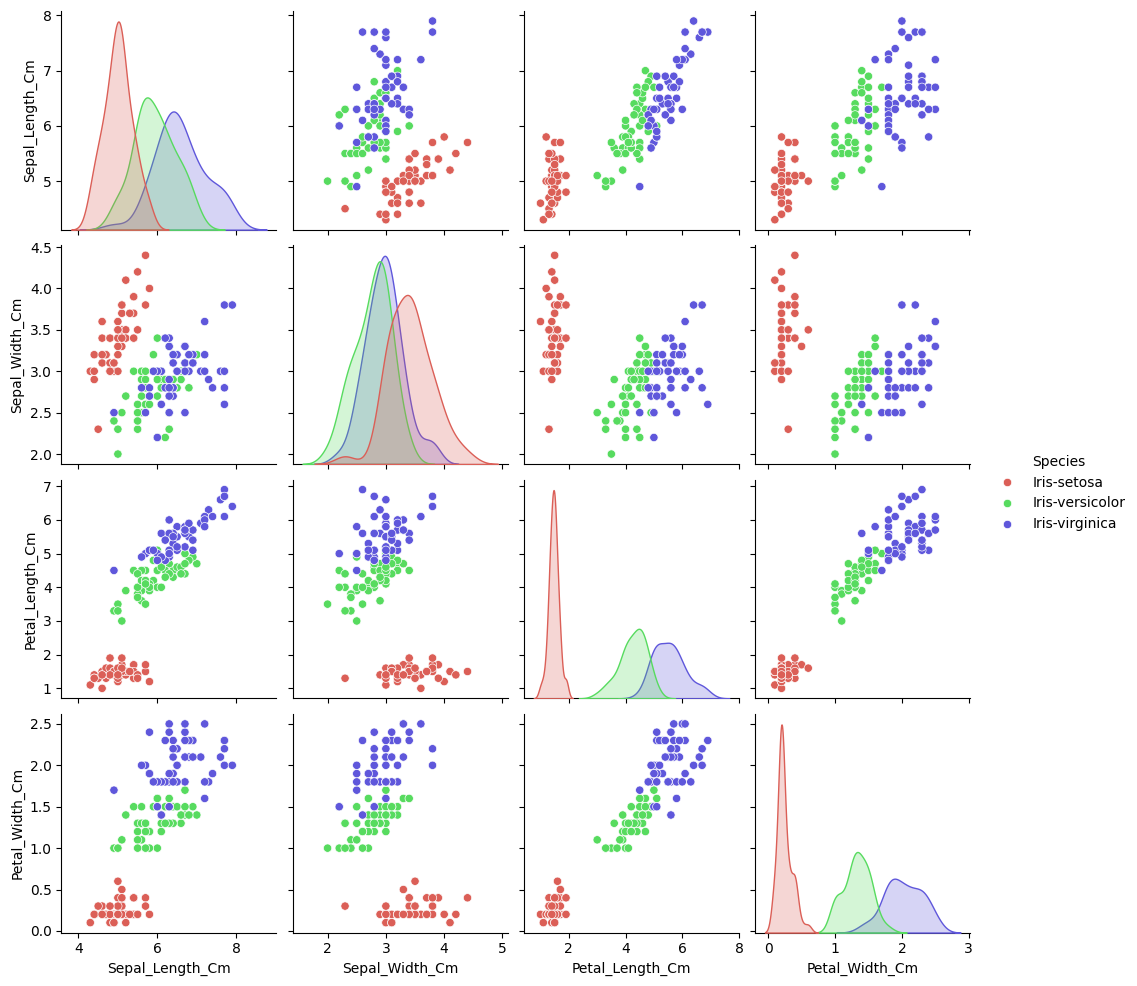

In [8]:
#Initiating Pairplot from the Seaborn library to understand the dataset better
#In a pairplot, the diagonal graphs display the relationship of the corresponding variables with the target variable (referencing: hue = "Species")

sns.pairplot(data = df, hue = "Species", palette = "hls")

#conclusion: There is a strong correlation observed between "Petal_Width_Cm" and "Petal_Length_Cm" with the target variable (Strong "separation" of the target variable is observed when these variables are considered, diagonal axis)

In [9]:
#To better understand the correlation between variables with numerical values, the heatmap of the correlation matrix should be initialized.
#The "Species" target variable must be transformed from categorical to numerical values to facilitate its use in the heatmap for the correlation matrix.
#Creating a mirror variable in the dataframe for this reason.

df["Species_Numerical"] = df["Species"]

#data skim

df.head()

,Sepal_Length_Cm,Sepal_Width_Cm,Petal_Length_Cm,Petal_Width_Cm,Species,Species_Numerical
0,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa


In [10]:
#Now assigning numerical values to each type.
#For, Iris-setosa, 1
#For, Iris-versicolor, 2
#For, Iris-virginica, 3

df["Species_Numerical"] = df["Species_Numerical"].str.replace("Iris-setosa", "1")
df["Species_Numerical"] = df["Species_Numerical"].str.replace("Iris-versicolor", "2")
df["Species_Numerical"] = df["Species_Numerical"].str.replace("Iris-virginica", "3")

#data skim

df.head()

,Sepal_Length_Cm,Sepal_Width_Cm,Petal_Length_Cm,Petal_Width_Cm,Species,Species_Numerical
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


In [11]:
#To properly use it, string values need to be converted into numeric data types

df["Species_Numerical"] = pd.to_numeric(df["Species_Numerical"], downcast = "integer")

#data skim

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sepal_Length_Cm    150 non-null    float64
 1   Sepal_Width_Cm     150 non-null    float64
 2   Petal_Length_Cm    150 non-null    float64
 3   Petal_Width_Cm     150 non-null    float64
 4   Species            150 non-null    object 
 5   Species_Numerical  150 non-null    int8   
dtypes: float64(4), int8(1), object(1)
memory usage: 6.1+ KB


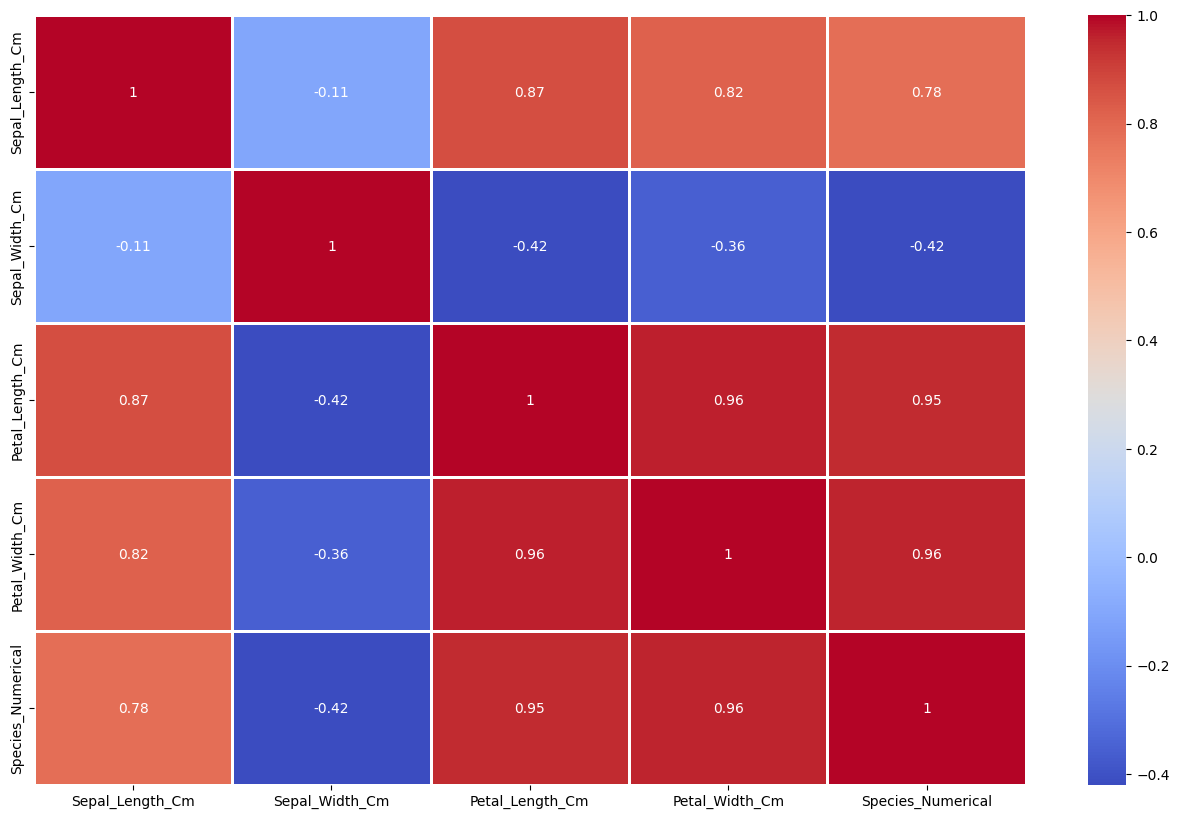

In [12]:
#Heatmap of Correlation Matrix with pd.corr() --->

plt.figure(figsize = (16,10))
Iris_Hmap = sns.heatmap(data = df.corr(numeric_only = True), annot = True, cmap = "coolwarm", linewidths = 1)
plt.show()
Iris_Hmap.figure.savefig("Iris_Hmap.png")

#conclusion: The pairplot and the heatmap of the correlation matrix both confirm a strong relationship between "Petal_Width_Cm" and "Petal_Length_Cm" with the target variable.
#conclusion_2: Besides the target variable, the significant correlation observed between "Petal_Width_Cm" and "Petal_Length_Cm" suggests that dropping the one with the lesser correlation to the target variable could be beneficial(To prevent overfitting and reduce model complexity).

In [13]:
#Dropping "Petal_Length_Cm" and also "Species_Numerical" as it is no longer needed.

df.drop(["Petal_Length_Cm", "Species_Numerical"], axis = 1, inplace = True)

#data skim

df.head()

,Sepal_Length_Cm,Sepal_Width_Cm,Petal_Width_Cm,Species
0,5.1,3.5,0.2,Iris-setosa
1,4.9,3.0,0.2,Iris-setosa
2,4.7,3.2,0.2,Iris-setosa
3,4.6,3.1,0.2,Iris-setosa
4,5.0,3.6,0.2,Iris-setosa


**Modeling for Machine Learning (Decision Tree)**

    This section will focus on data modeling using the decision tree estimator from Sklearn to develop an appropriate algorithm. Initially, a broad assessment will be conducted using the default settings. Following that, hyperparameter tuning will be explored to improve accuracy. 

1. Train Test Split

In [14]:
#splitting data into features (independent) and labels (dependent)

X = df.drop(["Species"], axis = 1)
y = df["Species"]

In [15]:
#Importing train_test_split() from the Sk-Learn library

from sklearn.model_selection import train_test_split

In [16]:
#now using train_test_split() to split data.
#setting train data - 80%, test data - 20%, random_state = 89

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 89)

2. Importing Estimator

In [17]:
#Importing the Decision Tree Classifier model object from the Sklearns tree family

from sklearn.tree import DecisionTreeClassifier

3. Training (Default Setup)

In [18]:
#assigning Decision Tree Classifier estimator to a variable for snap assessment

DT_Snap = DecisionTreeClassifier()

In [19]:
#preview

DT_Snap

DecisionTreeClassifier()

In [20]:
#Fitting train data into estimator to generate a model

DT_Snap.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
#Now it's time to generate predicted values using the algorithm trained with the train data.

y_predict_Snap = DT_Snap.predict(X_test)

3. Evaluation

In [22]:
#Importing some metrics for evaluation from sklearn.metrics

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

3. 1. Accuracy Score

In [23]:
#checking accuracy score

acc_scr_snap = accuracy_score(y_test, y_predict_Snap)

#printng out

print("Accuracy Score is:", acc_scr_snap)

Accuracy Score is: 0.9666666666666667


3. 2. Confusion Matrix

Text(0.5, 36.72222222222221, 'Predicted Values')

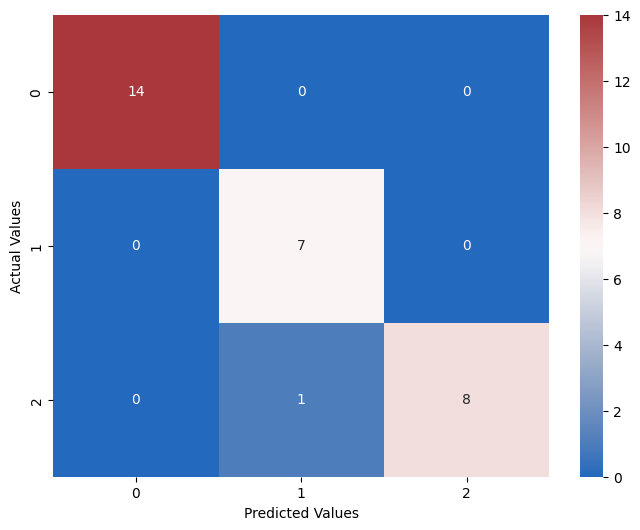

In [24]:
#Checking Confusion Matrix

cnf_mat = confusion_matrix(y_test, y_predict_Snap)

#confusion matrix heatmap

plt.figure(figsize = (8,6))
sns.heatmap(data = cnf_mat, annot = True, cmap = "vlag")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

#sumups- here, 0 --> Iris-setosa; 1 --> Iris-versicolor; 2 --> Iris-virginica

3. 3. Classification Report

In [25]:
#printng out the Classification Report

print(classification_report(y_test, y_predict_Snap))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.88      1.00      0.93         7
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        30
      macro avg       0.96      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



**Decision Tree Visualization**

    This section is dedicated to visualizing the decision tree structure, which will aid in comprehending the working model generated through data training.

In [26]:
#Importing the tree library

from sklearn import tree

In [27]:
#listing all the target (label/dependent variables) and feature (independent variables)

feature = list(df.columns[:-1])
target = list(df["Species"].unique())

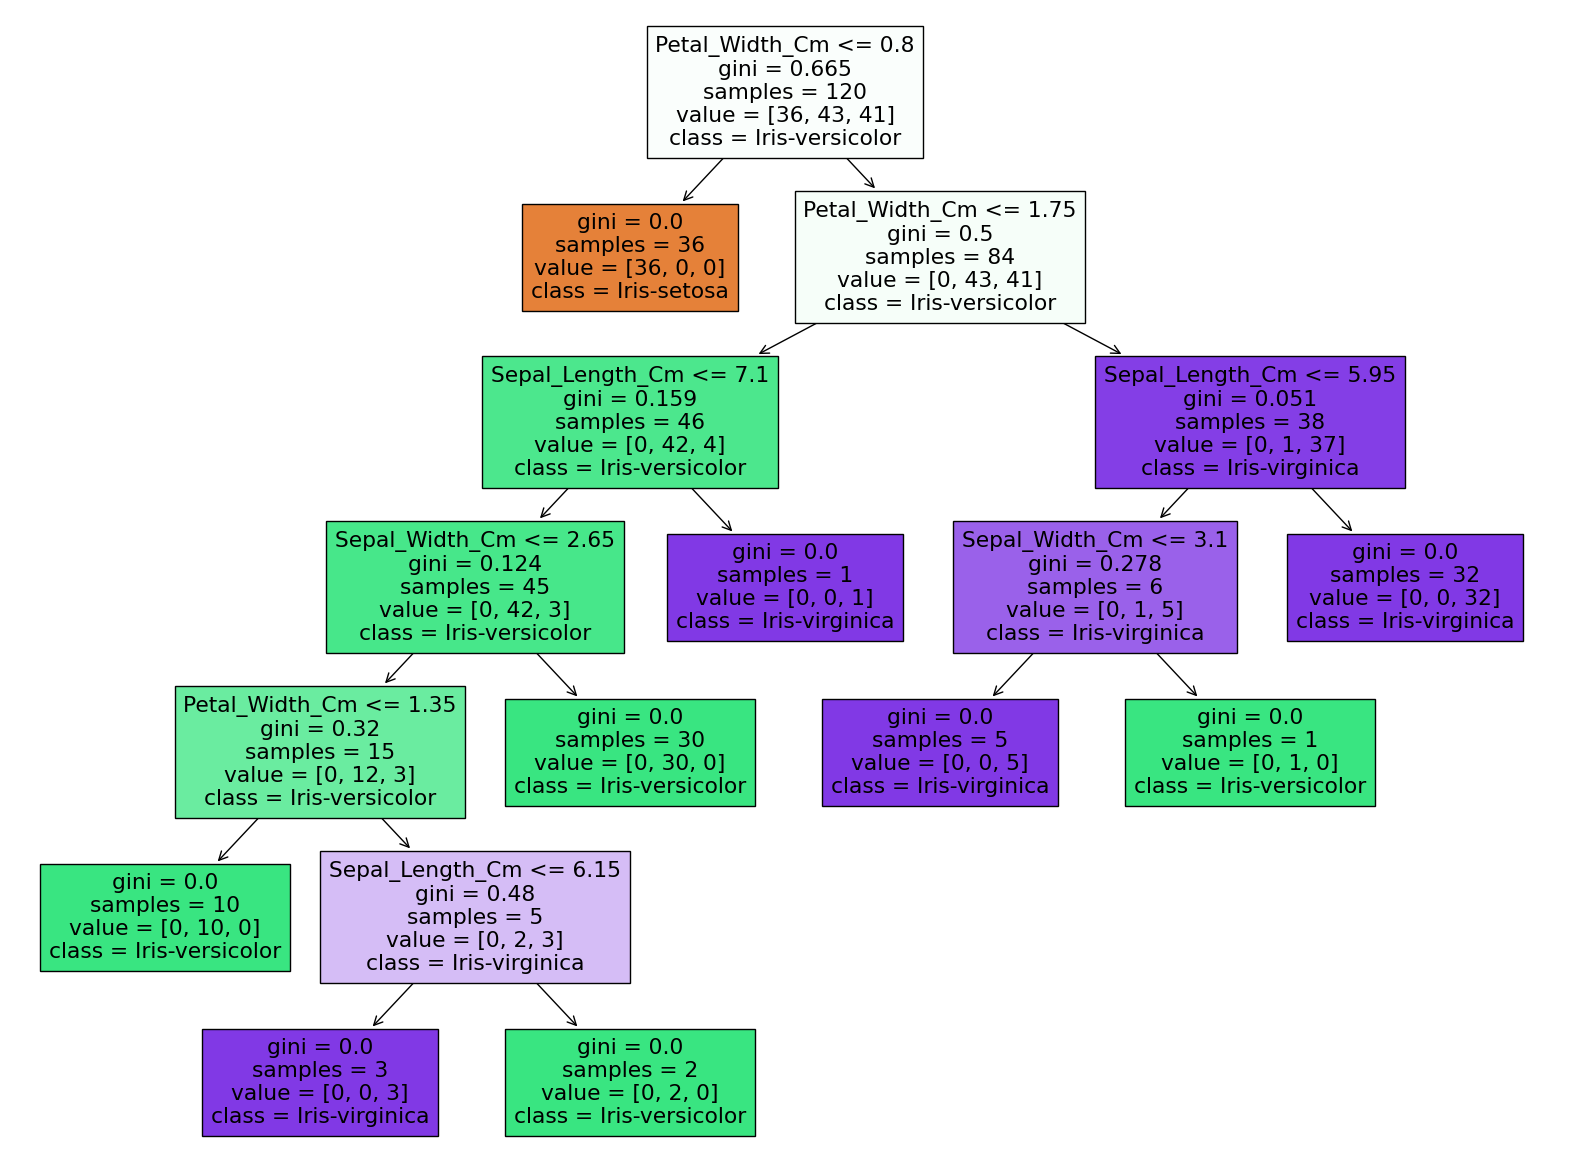

In [28]:
#ploting tree

plt.figure(figsize = (20, 15))
tree_fig = tree.plot_tree(DT_Snap, feature_names = feature, class_names = target, filled = True)

**Hyperparameter Optimization (HPO)**

    Although the results of the snap evaluation are quite good (over 90%), this section will continue to explore the best hyperparameter combinations to seek potential improvements in the accuracy score.

In [29]:
#importing GridSearch cross validation(CV) model

from sklearn.model_selection import GridSearchCV

In [30]:
#assigning estimator model to a variable for finding the best hyperparameter combination

DT_HPO = DecisionTreeClassifier()

In [31]:
#Preparing a list of parameters to evaluate all possible combinations and determine the one with the optimal performance.

Check_Parameters = {"criterion" : ["gini", "entropy", "log_loss"],
                    "max_depth" : np.arange(0, 20),
                    "max_features" : ["auto", "sqrt", "log2"],
                    "min_samples_split": np.arange(0, 10),
                    "min_samples_leaf" : np.arange(0, 10)
                   }

In [32]:
#Now, setting the GridSearchCV

DT_CV = GridSearchCV(estimator = DT_HPO, param_grid = Check_Parameters, n_jobs = 8, cv = 5, verbose = 5)

In [33]:
#fetching the train data to find out the best parameter combination

#mesuring time

HPO_start_time = time.time()

#Actual Code

DT_CV.fit(X_train, y_train)

#printing out execution time

print("Time it took to check all combinations ---> %s seconds" %(time.time() - HPO_start_time))

Fitting 5 folds for each of 18000 candidates, totalling 90000 fits
Time it took to check all combinations ---> 31.43379282951355 seconds


In [34]:
#after fitting and checking the hyperparameter combinations, checking the best score 

DT_CV.best_score_

0.9583333333333334

In [35]:
#Checking the best parameter combination

DT_CV.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 7}

In [36]:
#Retraining and evaluating the data with the best parameter combination found in the GridSearch cross-validation to determine whether there is any improvement.

DT_Best = DecisionTreeClassifier()

DT_Best.set_params(**DT_CV.best_params_)

DT_Best.fit(X_train, y_train)

y_predict_Best = DT_Best.predict(X_test)

acc_scr_best = accuracy_score(y_test, y_predict_Best)

print("Snap evaluation accuracy score was:", acc_scr_snap, "\n")
print("Hyperparameter tuned accuracy score is:", acc_scr_best, "\n")

performance_changes = ((acc_scr_best - acc_scr_snap) * 100)
print("Changes in the performance:", performance_changes, "%")

#conclusion: The performance of the best found hyperparameter combination remains consistent with the snapshot evaluation.

Snap evaluation accuracy score was: 0.9666666666666667 

Hyperparameter tuned accuracy score is: 0.9666666666666667 

Changes in the performance: 0.0 %


In [37]:
#printng out the Classification Report after hyperparameter optimization

print(classification_report(y_test, y_predict_Best))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.88      1.00      0.93         7
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        30
      macro avg       0.96      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



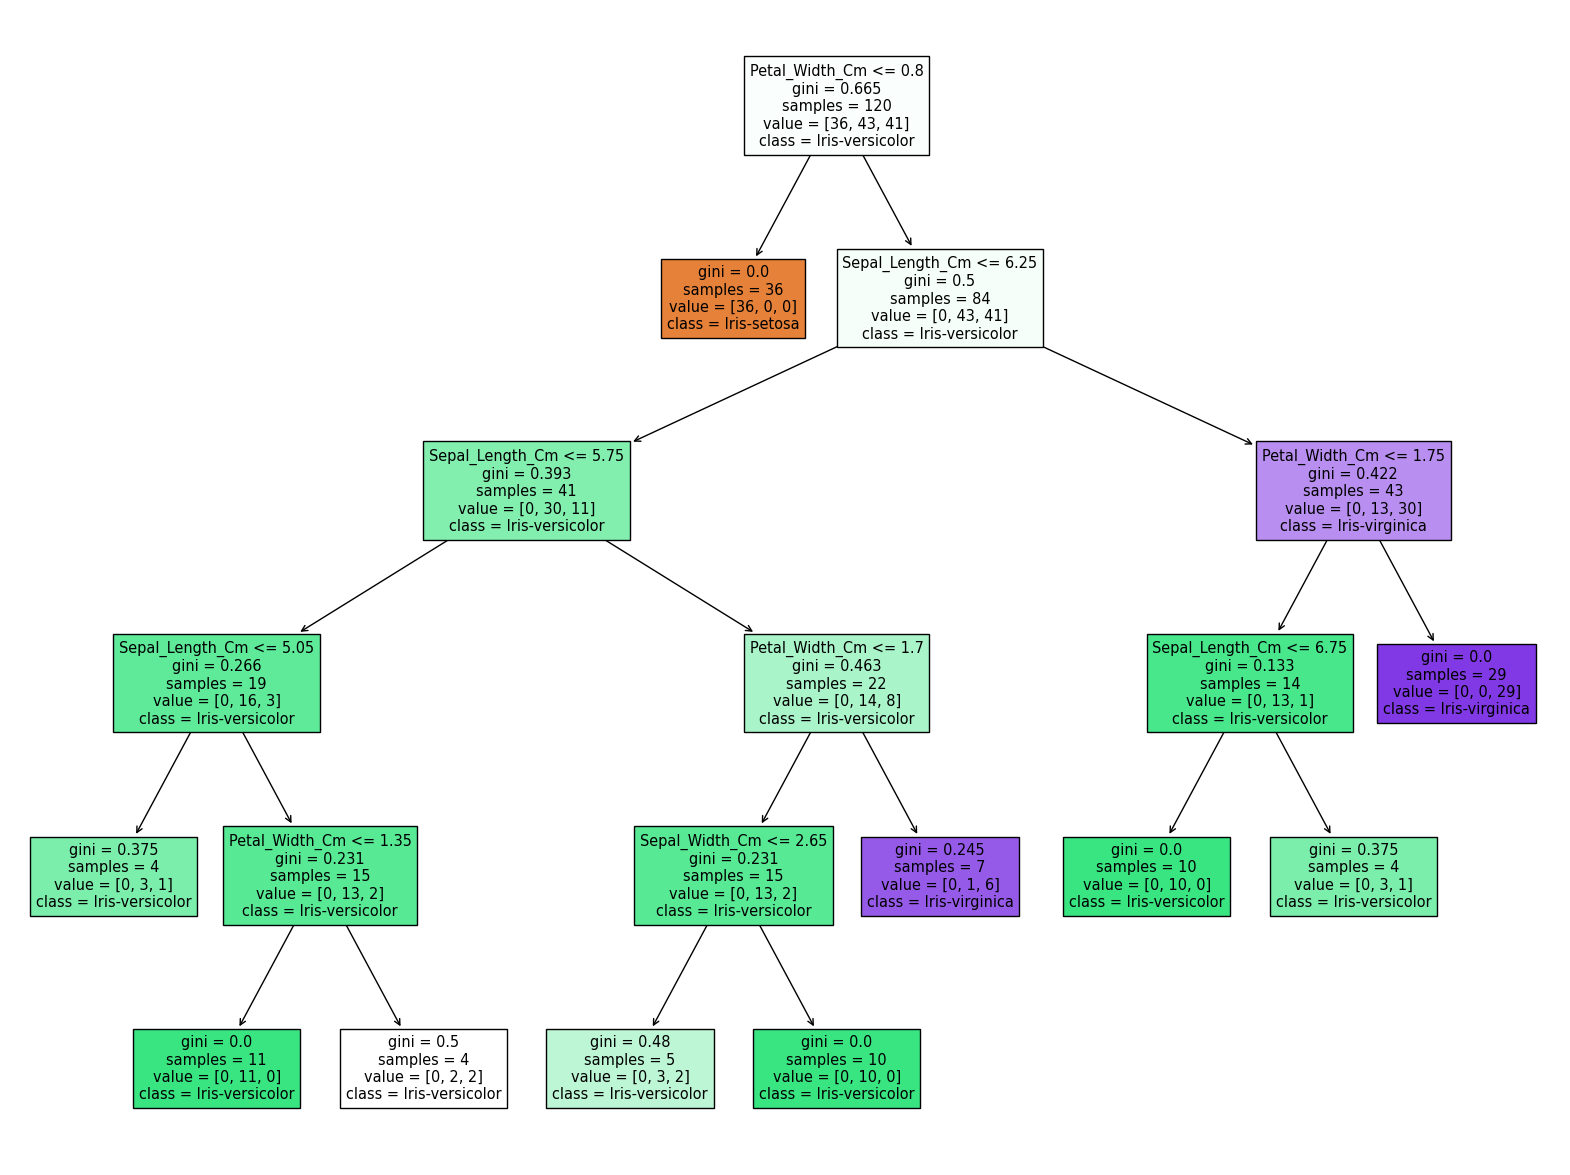

In [38]:
#ploting the new tuned tree

plt.figure(figsize = (20, 15))
tree_fig_tuned = tree.plot_tree(DT_Best, feature_names = feature, class_names = target, filled = True)
plt.savefig("tree_fig_tuned.png")

**Project Conclusion**

    The final results are quite satisfactory, as indicated by the classification report. Although hyperparameter optimization did not enhance the model's performance, the model was already nearly accurate. The credit for this high performance score largely goes to the quality of the data. 